In [1]:
import pandas as pd
import numpy as np

In [2]:
# Initialize empty lists for each column
names = []
descriptions = []
interests = []
categories = []
receiveds = []
goals = []
end_dates = []
markets = []

# Open the CSV file and read its contents
with open("ico_data.csv", newline="", encoding="windows-1252") as csvfile:
    rows = csvfile.readlines()

    # Loop through the rows and extract the data
    i = 0
    while i < len(rows):
        # Check if we have a valid record
        if (
            rows[i].strip().split(",")[0] != ""
            and rows[i + 1].strip().split(",")[0] != ""
        ):
            # Extract the data from each row
            name = rows[i].strip().split(",")[0]
            description = rows[i + 1].strip().split(",")[0]
            interest = rows[i + 3].strip().split(",")[0]
            category = rows[i + 5].strip().split(",")[0]
            received = rows[i + 7].strip().replace(",", "")
            goal = rows[i + 9].strip().replace(",", "")
            end_date = rows[i + 11].strip().split(",")[0]
            market = rows[i + 13].strip().split(",")[0]

            print(name)
            print(description)
            print(interest)
            print(category)
            print(received)
            print(goal)
            print(end_date)
            print(market)
            print("---------------------------------")

            # Append the data to the corresponding list
            names.append(name)
            descriptions.append(description)
            interests.append(interest)
            categories.append(category)
            receiveds.append(received)
            goals.append(goal)
            end_dates.append(end_date)
            markets.append(market)

            i += 14

        else:
            # Move to the next row
            i += 1

KryptAI
KryptAI's decentralized ecosystem offers...
NOT RATED
Artificial Intelligence
"$70000"
NOT SET
2-Apr-23
KAI
---------------------------------
WiFi Map
WiFi Map is a community-powered connectivity...
NOT RATED
Platform
"$1700000"
"$1700000"
1-Apr-23
WIFI
---------------------------------
Coniun
Coniun is launched as an all-in-one...
NOT RATED
Blockchain Service
"$5380000"
"$700000"
31-Mar-23
CONI
---------------------------------
Alaska Gold Rush
Alaska Gold Rush is the WEB3 native...
NOT RATED
Gaming
"$150000"
NOT SET
30-Mar-23
CARAT
---------------------------------
ARTT Network IEO on Bitforex Launchpad
ARTT Network is an innovative tokenization...
NOT RATED
Platform
"$225000"
"$230000"
30-Mar-23
ARTT
---------------------------------
NuriTopia IEO on Gate
"NuriFlex Group’s metaverse platform
NOT RATED
Platform
PENDING
NOT SET
24-Mar-23
NBLU
---------------------------------
Arbitrum
Arbitrum is an optimistic rollup built...
VERY HIGH
Blockchain Service
"$123700000"
NOT SET
2

In [3]:
# Create a dataframe from the extracted data
df = pd.DataFrame(
    {
        "name": names,
        "description": descriptions,
        "interest": interests,
        "category": categories,
        "received": receiveds,
        "goal": goals,
        "end_date": end_dates,
        "market": markets,
    }
)

# Print the dataframe
print(df)

                                        name  \
0                                    KryptAI   
1                                   WiFi Map   
2                                     Coniun   
3                           Alaska Gold Rush   
4     ARTT Network IEO on Bitforex Launchpad   
...                                      ...   
1444                                  Aditus   
1445                           CommerceBlock   
1446                                   Bread   
1447                                MiniApps   
1448                                SophiaTX   

                                           description   interest  \
0          KryptAI's decentralized ecosystem offers...  NOT RATED   
1      WiFi Map is a community-powered connectivity...  NOT RATED   
2               Coniun is launched as an all-in-one...  NOT RATED   
3               Alaska Gold Rush is the WEB3 native...  NOT RATED   
4        ARTT Network is an innovative tokenization...  NOT RATED   
...      

In [4]:
# Rename columns and keep only the desired columns
df = df.rename(
    columns={
        "name": "project_name",
        "market": "token_name",
        "received": "total_fund_raised",
        "goal": "soft_cap",
    }
)[["project_name", "token_name", "soft_cap", "total_fund_raised", "end_date"]]

# Filter the rows based on the end_date column
df = df[pd.to_datetime(df["end_date"], format="%d-%b-%y").dt.year.between(2018, 2021)]

# Remove rows where soft_cap is "NOT SET" or empty
df = df[(df["soft_cap"].notnull()) & (df["soft_cap"] != 0)]

# Remove the dollar sign and percentage from the soft_cap column
df["soft_cap"] = df["soft_cap"].str.replace(r"[$,%]", "", regex=True)

# Extract numerical values from the soft_cap column
df["soft_cap"] = (
    df["soft_cap"].str.extract(r"(\d+)", expand=False).astype(float).astype("Int64")
)

# Remove rows where total_fund_raised is "PENDING" or empty
df = df[(df["total_fund_raised"] != "PENDING") & (df["total_fund_raised"] != "")]

df["total_fund_raised"] = pd.to_numeric(
    df["total_fund_raised"].str.extract(r"(\d+)", expand=False), downcast="integer"
)

# Reorder the columns
df = df.reindex(
    columns=["project_name", "token_name", "soft_cap", "total_fund_raised", "end_date"]
)

# Print the resulting dataframe
print(df)

               project_name token_name  soft_cap  total_fund_raised   end_date
334             Avocado Dao        AVG      <NA>           27200000  31-Dec-21
335              Alethea AI        ALI      <NA>           31100000  31-Dec-21
336                  Abachi        ABI   3080000            3075000  31-Dec-21
337   World of Defish Poolz        WOD      <NA>             500000  29-Dec-21
338     ??Rise of Defenders        RDR   2550000            2550000  29-Dec-21
...                     ...        ...       ...                ...        ...
1416                 Zipper       ZIPT  19220000           19220000   3-Jan-18
1417                 Lamden        TAU  10000000           10000000   2-Jan-18
1418                   IOST       IOST  31260000           31255000   2-Jan-18
1419                  Bloom        BLT  80490000           41420705   1-Jan-18
1420                Spectiv        SIG  10620000            7605767   1-Jan-18

[985 rows x 5 columns]


In [5]:
df.head(50)

,project_name,token_name,soft_cap,total_fund_raised,end_date
334,Avocado Dao,AVG,<NA>,27200000,31-Dec-21
335,Alethea AI,ALI,<NA>,31100000,31-Dec-21
336,Abachi,ABI,3080000,3075000,31-Dec-21
337,World of Defish Poolz,WOD,<NA>,500000,29-Dec-21
338,??Rise of Defenders,RDR,2550000,2550000,29-Dec-21
339,Galaxy War,GWT,4000000,4000000,29-Dec-21
340,Decimated IEO on Huobi Prime,DIO,600000,600000,29-Dec-21
342,CeloLaunch,CLA,2260000,2264000,27-Dec-21
343,MeanFi,MEAN,3750000,3750000,27-Dec-21
344,Angels Creed,ANGEL,300000,300000,25-Dec-21


In [6]:
# Remove rows with <NA> values
df = df.dropna()

# Create a new column ico_success
df["ico_success"] = np.where(df["soft_cap"] > df["total_fund_raised"], 0, 1)

# Remove all rows with empty columns
df = df.dropna(how="any")

# Select rows where token_name contains only alphabetical characters
mask = df["token_name"].str.isalpha()
df = df[mask]

# Print the resulting dataframe
df.head(20)

,project_name,token_name,soft_cap,total_fund_raised,end_date,ico_success
336,Abachi,ABI,3080000,3075000,31-Dec-21,0
338,??Rise of Defenders,RDR,2550000,2550000,29-Dec-21,1
339,Galaxy War,GWT,4000000,4000000,29-Dec-21,1
340,Decimated IEO on Huobi Prime,DIO,600000,600000,29-Dec-21,1
342,CeloLaunch,CLA,2260000,2264000,27-Dec-21,1
343,MeanFi,MEAN,3750000,3750000,27-Dec-21,1
344,Angels Creed,ANGEL,300000,300000,25-Dec-21,1
346,MetaGaming Guild DAO Maker,MGG,2850000,2845000,23-Dec-21,0
347,pSTAKE Coinlist,PSTAKE,20000000,20000000,23-Dec-21,1
349,izumi Finance,IZI,3950000,3950000,21-Dec-21,1


In [7]:
df.tail(20)

,project_name,token_name,soft_cap,total_fund_raised,end_date,ico_success
1398,adbank,ADB,13960000,13962900,13-Jan-18,1
1399,Olympus Labs,MOT,60320000,60324750,13-Jan-18,1
1400,LALA World,LALA,20190000,20191350,13-Jan-18,1
1401,Latium,LATX,15000000,14400000,12-Jan-18,0
1403,FortKnoxster,FKX,15000000,15000000,12-Jan-18,1
1404,aXpire,AXP,20000000,20000000,11-Jan-18,1
1405,Loom Network,LOOM,57000000,45808270,10-Jan-18,0
1406,SwissBorg,CHSB,50000000,50000000,10-Jan-18,1
1408,Block.array,ARY,14380000,14375000,10-Jan-18,0
1410,Neuromation,NTK,71670000,13895400,8-Jan-18,0


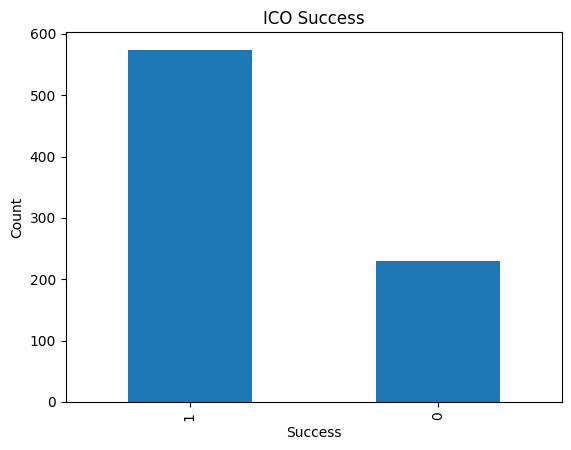

In [8]:
import matplotlib.pyplot as plt

# Count the number of 0's and 1's in the ico_success column
success_counts = df["ico_success"].value_counts()

# Create a bar plot for the success_counts variable
ax = success_counts.plot.bar()

# Set the plot title and axes labels
ax.set_title("ICO Success")
ax.set_xlabel("Success")
ax.set_ylabel("Count")

# Show the plot
plt.show()

In [9]:
# Export the cleaned dataframe to a CSV file
df.to_csv("cleaned_ico_data.csv", index=False)